In [ ]:
def is_string_integer(s):
    '''This function checks whether the string is 
    a valid integer in base 10
    '''
    assert len(s)==1
    if ord(s)<58 and ord(s)>47:
        return True
    return False


In [ ]:
is_string_integer("9")

In [ ]:
import itertools as it

def get_power_of3(x):
    ''' This function constructs number x using any possible 
    non-repeating combination of [1,3,9,27] i.e. by both adding/subtracting operations
    '''
    assert isinstance(x,int)
    assert x<=40 and x>=1
    for v in it.product([1,-1,0],repeat=4):
        s=sum([ a*b for a,b in zip([1,3,9,27],v)])
        if s==x:
            return list(v)
    


    

In [ ]:
def write_columns(data, fname):
    '''This function writes the data from list in three columns with following values per column:
    data_value, data_value**2, (data_value+data_value**2)/3
    '''
    assert isinstance(data, list)
    assert isinstance(fname, str)
    with open(fname,'w') as f:
        for d in data:
            assert isinstance(d,float) or isinstance(d,int)            
            # print(f'{d:.2f},{d**2:.2f},{(d+d**2)/3.0:.2f}')
            f.write(f'{d:.2f},{d**2:.2f},{(d+d**2)/3.0:.2f}')
            f.write("\n")


In [ ]:
write_columns([4,3,2,4],"p4_test")

In [ ]:
def write_chunks_of_five(words, fname):
    ''' This function writes a file with consecutibe non-overlapping sequences 
    of five words merged in one line.
    '''
    assert isinstance(words, list)
    assert isinstance(fname,str)
    n = len(words)
    with open(fname,'w') as f:
        for st in range(0,n,5):
            en = st+5 if st+5<=n else n
            for w in words[st:en]:
                assert isinstance(w,str)
            row = " ".join(words[st:en])
            print(row)
            f.write(row)
            f.write("\n")

In [ ]:
write_chunks_of_five(["this","dfd","fsdfs","dfff","srrrr","dfdfdf","sdfdssdsd"],"p6_test")

In [ ]:
write_chunks_of_five(["dfsdf"],"p6_test")

In [ ]:
def fibonacci(n):
    ''' This generator func computes the first n Fibonnacci numbers.'''
    assert n>=0
    assert isinstance(n, int)
    a = 1
    b = 1
    if n==0:
        yield a
    for i in range(1,n+1):
        if i==1 or i==0:
            yield a
        elif i==2:
            yield b
        else:
            c = a+b
            yield c
            a,b=b,c

In [ ]:
list(fibonacci(3))

In [ ]:
def all_sublists(x):
    ''' This function generates all sublists i.e. 2**len(x) subset
    of list x. Ordering is ignored and func asserts against empty input array.
    '''
    assert isinstance(x,list)
    assert x!=[]
    unique_list = []
    for v in x:
        assert v!=[]
        if v not in unique_list:
            unique_list.append(v)
        else:
            assert v not in unique_list

    x_len=len(x)
    n = 2**x_len
    ans=[]
    for i in range(1,n):
        temp=i
        sublist=[]
        for j in range(x_len):
            if (temp & 1) == 1:
                sublist.append(x[j])
            temp=temp>>1
        ans.append(sublist)
    assert len(ans) == 2**len(x)-1
    return ans
                



In [ ]:
all_sublists([[3,4,3],[3,4,5]])

In [ ]:
number_of_days(2021,10)

In [ ]:
number_of_leap_years(1890,1908)

In [ ]:
get_day_of_week(2021,9,30)

In [ ]:
from time import sleep
import random
from datetime import datetime
import itertools as it

def producer():
    'produce timestamps'
    starttime = datetime.now()
    while True:
        sleep(random.uniform(0,0.2))
        yield datetime.now()-starttime

In [ ]:
import types

def tracker(p,limit=1):
    ''' This function is to track the odd numbered seconds from 
    producer's output upto a given limit.
    |p|: producer 
    |limit|: tracking limit for odd numbered seconds 
    '''
    assert limit > 0
    assert isinstance(p,types.GeneratorType)
    sec=0
    sumi=0
    while sumi<limit:
        delta=next(p)
        sec=int(delta.total_seconds())
        if sec%2!=0:
            sumi+=1
        limitUpdate = (yield sumi)
        if limitUpdate!=None:
            assert limitUpdate>=limit
            limit = limitUpdate
        
        


In [ ]:
p=producer()
t=tracker(p,limit=2)

In [ ]:
list(tracker(["ssds"],limit=3))

In [ ]:
next(t)

In [36]:
import itertools as it
import random

def get_sample(nbits=3, prob=None, n=4):
    ''' This func returns list of n samples from a finite PMF defined by dict prob
    with keys defined by specific num of bits.
    '''
    assert isinstance(prob,dict) and isinstance(nbits,int) and isinstance(n,int)
    assert nbits>0
    assert len(prob.keys())==pow(2,nbits)
    assert sum(list(prob.values()))==1

    keys=list(prob.keys())
    w = [prob[x] for x in keys]
    return random.choices(keys,w,k=n)

In [8]:
bits=3
p={ "".join(x):1/pow(2,bits) for x in it.product(["1","0"],repeat=bits)}
get_sample(bits,p,2)


['001', '101']

In [61]:
get_sammple(3,p,2)

['111', '110', '101', '100', '011', '010', '001', '000'] [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]


['011', '100']

In [37]:
def map_bitstring(l):
    ''' This func takes a list of bitstrings (i.e., 0101) and maps each bitstring 
    to 0 if the number of 0s in the bitstring strictly exceeds the number of 1s
    '''
    assert isinstance(l,list)
    strings = list(set(l))    
    ans = {}
    for s in strings:
        assert isinstance(s,str)
        intString = []
        for b in s:
            assert b=='1' or b=='0'
            intString.append(int(b))

        if sum(intString)>=len(intString)-sum(intString):
            ans[s]=1
        else:
            ans[s]=0
    return ans

In [35]:
map_bitstring(['100', '1100', '110', '010', '111', '000', '110', '010', '011', '000'])

{'011': 1, '1100': 1, '000': 0, '111': 1, '100': 0, '010': 0, '110': 1}

In [40]:
def gather_values(x):
    '''This func generates n samples and tally the number of times an 
    existing key is repeated. Generate a new dictionary with 
    bitstrings as keys and with values as lists that contain 
    the corresponding mapped values from map_bitstring.
    '''
    assert isinstance(x,list)
    bit_map = map_bitstring(x)
    freq_map = {}
    for b in x:
        if b not in freq_map:
            freq_map[b]=[]
        freq_map[b].append(bit_map[b])
    return freq_map
    


In [39]:
gather_values(['10', '11', '01', '00', '10', '00', '00', '11', '10', '00', '00', '01', '01', '11', '10', '00', '11', '10', '11', '11'])

{'10': [1, 1, 1, 1, 1],
 '11': [1, 1, 1, 1, 1, 1],
 '01': [1, 1, 1],
 '00': [0, 0, 0, 0, 0, 0]}

In [133]:
def threshold_values(seq,threshold=1):
    ''' This func thresholds the sampled values based upon their frequency and value.
    Given threshold=2, we want to keep only those bitstrings with 
    the two highest frequency counts of the 1 value.
    '''
    assert threshold>0
    g_map = gather_values(seq)
    f = [ k for k,v in sorted(g_map.items(),key=lambda x: (len(x[1]),-int(x[0],2)),reverse=True)][:threshold]
    f_map={}
    for k,v in g_map.items():
        if k in f:
            f_map[k]=1
        else:
            f_map[k]=0
        
    return f_map 

In [134]:
seq=['1111', '0110', '1001', '0011', '0111', '0100', '0111', '1100', '0011', '0010', '0010', '1010', '1010', '1100', '0110', '0101', '0110', '1111', '1001', '0110', '0010', '1101', '0101', '0010', '0100', '0010', '0000', '0000', '0011', '0110', '0101', '1010', '1011', '1101', '1100', '0111', '1110', '0100', '0110', '1101', '0001', '1110', '0010', '0001', '1010', '1010', '0011', '1000', '0010', '0000', '1010', '1101', '1111', '1000', '1000', '0010', '1010', '0101', '0101', '1101', '0110', '1001', '1100', '1100', '1000', '1010', '0011', '0101', '0101', '0011', '0001', '1010', '0011', '0011', '1101', '1010', '0101', '0011', '1011', '0101', '0000', '1111', '1001', '0101', '1100', '0011', '1111', '1101', '0001', '1111', '1110', '1111', '0001', '0010', '0110', '0100', '0101', '1100', '1110', '1001'] 

In [135]:
threshold_values(seq,3)

{'1111': 0,
 '0110': 0,
 '1001': 0,
 '0011': 1,
 '0111': 0,
 '0100': 0,
 '1100': 0,
 '0010': 0,
 '1010': 1,
 '0101': 1,
 '1101': 0,
 '0000': 0,
 '1011': 0,
 '1110': 0,
 '0001': 0,
 '1000': 0}

In [45]:
import itertools as it

def descrambler(w,k):
    '''This generator yields all outcomes which descrambles the word into
    k paritions with each partition representing a word from given common
    word dictionary.'''
    assert isinstance(w,str)
    assert isinstance(k,tuple)
    assert len(w)==sum(k)
    assert " " not in w
    import collections
    word_map=collections.defaultdict(set)
    with open('words.txt','r') as f:
        for l in f.readlines():
            temp = l.strip()
            key=len(temp)
            if key not in word_map:
                word_map[key]=set()
            word_map[key].add(l.strip())
    print("Word List loaded")
    ans = set()
    for p in it.permutations(w,len(w)):
        s = "".join(p)
        st=0
        f=0
        res=[]
        
        for gap in k:
            en=st+gap
            if s[st:en] not in word_map[gap]:
                f=1
                break
            res.append(s[st:en])
            st=en
        res=" ".join(res)
        if f==0 and res not in ans:
            ans.add(res)
            yield res




In [46]:
g=descrambler('trleeohelh' , k=(5,5))
next(g)
list(g)

Word List loaded


['there hello', 'hello three', 'hello there']

In [41]:
"".join(sorted('choeounokeoitg'))

'ceeghiknooootu'

In [86]:
w='choeounokeoitg'
k=(3,5,6)
word_map={}
with open('words.txt','r') as f:
    for l in f.readlines():
        temp = l.strip()
        sort_s = "".join(sorted(temp))
        if sort_s not in word_map:
            word_map[sort_s]=set()
        word_map[sort_s].add(l.strip())
print("Words loaded ")

Words loaded 


In [88]:
word_map['eelrt']

KeyError: 'eelrt'

In [13]:
import itertools as it

def descrambler(w,k):
    '''This generator yields all outcomes which descrambles the word into
    k paritions with each partition representing a word from given common
    word dictionary.'''
    assert isinstance(w,str)
    assert isinstance(k,tuple)
    assert len(w)==sum(k)
    assert " " not in w
    
    word_map = {}
    with open('words.txt','r') as f:
        for l in f.readlines():
            temp = l.strip()
            sort_s = "".join(sorted(temp))
            if sort_s not in word_map:
                word_map[sort_s]=set()
            word_map[sort_s].add(temp)
    print("Words loaded! ")
    
    ans_set=set()
    def gen(tot_k,pos,part_k,words,word,vis):
        if pos>k[part_k] or part_k>tot_k:
            return
        if pos==k[part_k]: 
            sorted_key = "".join(sorted(word))
            if sorted_key in word_map:
                for wi in word_map[sorted_key]:
                    # print("Boom foundiiiiii ",wi,word,part_k,tot_k)    
#                     if wi in words:
#                         return
                    words.append(wi)
                    if part_k>=tot_k:
                        if " ".join(words) not in ans_set:
                            ans_set.add(" ".join(words))
                            print("Booom ",part_k,tot_k," ".join(words))
                    else:
                        gen(tot_k,0,part_k+1,words,"",vis)
                    words.pop()
            return
        # print(word,words,pos,part_k,k)
        for i in range(0,len(w)):
            if i not in vis or vis[i]!=1:
                # print(word)
                vis[i]=1
                gen(tot_k,pos+1,part_k,words,word+w[i],vis)
                vis[i]=0
#                 gen(tot_k,pos,part_k,words,word,vis)
        return

    gen(len(k)-1,0,0,[],"",{})
    return list(ans_set)

In [19]:
import itertools as it

def descrambler(w,k):
    '''This generator yields all outcomes which descrambles the word into
    k paritions with each partition representing a word from given common
    word dictionary.'''
    assert isinstance(w,str)
    assert isinstance(k,tuple)
    assert len(w)==sum(k)
    assert " " not in w
    
    from collections import defaultdict
    word_map = defaultdict(set)
    with open('words.txt','r') as f:
        while True:
            l = f.readline()
            
            if not l:
                break
            temp = l.strip()
            if len(temp) not in k:
                continue
            word_map[len(temp)].add(temp)
#     for k,v in word_map.items():
#         print(k,len(v))
    
    ans_set=set()    
    mem_map=defaultdict(int)
    def gen(tot_k,pos,part_k,words,word,vis):
        if pos>k[part_k] or part_k>tot_k:
            return
        
        if pos==k[part_k]: 
            if word in word_map[len(word)]:
                words.append(word)
                if part_k>=tot_k:
                    ordered_w = " ".join(words)
                    if ordered_w not in ans_set:
                        ans_set.add(ordered_w)                    
                else:
                    if mem_map[(part_k,word)]!=1:
                        mem_map[(part_k,word)]=1
                        gen(tot_k,0,part_k+1,words,"",vis)
                        
                words.pop()
            return

        for i in range(0,len(w)):
            if i not in vis or vis[i]!=1:
                vis[i]=1
                gen(tot_k,pos+1,part_k,words,word+w[i],vis)
                vis[i]=0
#         mem_map[(word,part_k,pos)]=1
        return 

    gen(len(k)-1,0,0,[],"",{})
    
    for i in list(ans_set):
        yield i

In [23]:
from collections import defaultdict,Counter

def descrambler(w,k):
    '''This generator yields all outcomes which descrambles the word into
    k paritions with each partition representing a word from given common
    word dictionary.'''
    assert isinstance(w,str)
    assert isinstance(k,tuple)
    assert len(w)==sum(k)
    assert " " not in w
    
    word_map = defaultdict(set)
    with open('words.txt','r') as f:
        while True:
            l = f.readline()
            
            if not l:
                break
            temp = l.strip()
            if len(temp) not in k:
                continue
            word_map[len(temp)].add(temp)
    
    ans_set=set()
    def gen(tot_part,freq_c, k_part, words):
        if k_part>=tot_part:
            if " ".join(words) not in ans_set:
                ans_set.add(" ".join(words))
            return
        for word in word_map[k[k_part]]:
            source_counter = Counter(word)
            target_counter = freq_c.copy()
            target_counter.subtract(source_counter)
            
            if any([x<0 for x in target_counter.values()]):
                continue
            else:
                words.append(word)
                gen(tot_part,target_counter,k_part+1,words)
                words.pop()
    gen(len(k),Counter(w),0,[])  
    
    for i in list(ans_set):
        yield i
            
    
    

In [24]:
%time list(descrambler('choeounokeoitg',(3,5,6)))

Wall time: 5.08 s


['neo ought cookie',
 'neo tough cookie',
 'one tough cookie',
 'one ought cookie']

In [25]:
g=descrambler('qeodwnsciseuesincereins',(4,7,12))
next(g)

'wise insider consequences'

In [55]:
g=descrambler('choeounokeoitg',(3,5,6))
next(g)

'one ought cookie'

In [64]:
next(g)

'one ought cookie ought cookie ought cookie tough cookie tough cookie cookie'

In [27]:

%time descrambler('choeounokeoitg',(3,5,6))
# %time descrambler('trleeohelh' , k=(5,5))

Booom  2 2 one ought cookie
Booom  2 2 one tough cookie
Booom  2 2 neo ought cookie
Booom  2 2 neo tough cookie
Wall time: 38.7 s


['one tough cookie',
 'neo ought cookie',
 'neo tough cookie',
 'one ought cookie']

In [23]:
next(g)

TypeError: 'int' object is not iterable

In [3]:
from urllib.request import urlopen
u='https://storage.googleapis.com/class-notes-181217.appspot.com/google-10000-english-no-swears.txt'
response = urlopen(u)
words = [i.strip().decode('utf8') for i in response.readlines()]

In [47]:
from collections import Counter

def get_average_word_length(words):
    ''' This function evaluates the average length of words from input list of words.'''

    assert isinstance(words, list)
    assert len(words)!=0

    cnt_dict = {}
    for w in words:
        if w=="":
            continue
        assert len(w)>0
        if w not in cnt_dict:
            cnt_dict[w]=0
        cnt_dict[w]+=1
    sumi=0
    n=0
    for w,c in cnt_dict.items():
        sumi+=len(w)*c
        n+=c
    return float(sumi)/n

def get_longest_word(words):
    ''' This function returns the longst word from given words list.'''

    assert isinstance(words,list)
    assert len(words)!=0

    maxWordLen = 0
    longestWord = ""
    for w in words:
        assert isinstance(w,str)
        if len(w) >= maxWordLen:
            maxWordLen = len(w)
            longestWord = w
    
    assert longestWord!=""
    return  longestWord 
 
def get_longest_words_startswith(words,start):
    ''' This function returns the longest word that starts with given single character "start"
    from the given words list.
    '''

    assert isinstance(words,list)
    assert len(words)!=0
    assert(isinstance(start,str))
    
    maxWordLen = 0
    longestWord = ""

    for w in words:
        assert isinstance(w,str)
        if w.startswith(start) and len(w)>=maxWordLen:
            maxWordLen=len(w)
            longestWord = w
            
    assert longestWord!=""
    return  longestWord 
 
def get_most_common_start(words):
    ''' This function return the most commmon starting letter in word list.'''

    assert isinstance(words,list)
    assert len(words)!=0

    firstCharList = []
    for w in words:
        assert isinstance(w,str)
        assert len(w) != 0
        firstCharList.append(w[0])
    return Counter(firstCharList).most_common(1)[0][0]

def get_most_common_end(words):
    ''' This function return the most commmon ending letter in word list.'''

    assert isinstance(words,list)
    assert len(words)!=0

    lastCharList = []
    for w in words:
        assert isinstance(w,str)
        assert len(w) != 0
        lastCharList.append(w[-1])
    return Counter(lastCharList).most_common(1)[0][0]

In [48]:
words[:100:5]

['the',
 'in',
 'by',
 'it',
 'from',
 'have',
 'we',
 'about',
 'search',
 'other',
 'they',
 'what',
 'use',
 'so',
 'business',
 'help',
 'c',
 'would',
 'services',
 'like']

In [54]:
get_most_common_end(words[:100:5])

'e'

In [101]:
class Interval(object):
    ''' This class handles Interval data structure and addtion operation for merging them.'''

    def __init__(self,a,b):
        """
        :a: integer
        :b: integer
        """
        assert a<b
        assert isinstance(a,int)
        assert isinstance(b,int)
        self._a = a
        self._b = b

    def __repr__(self):
        return f"Interval({self._a},{self._b})"
    def __eq__(self,other):
        return self._a == other._a and self._b == other._b
    def __lt__(self,other):
        return self._b < other._a 
    def __gt__(self,other):
        return self._a > other._b 
    def __ge__(self,other):
        return  self._b > other._a and self._a<other._b 
    def __le__(self,other):
        return self._a < other._a and self._b> other._a
    
    def __add__(self,other):
        assert isinstance(other, Interval)
                
        if self>other or other>self:
            if self>other:
                return [other,self]
            return [self,other]
        else:
            left = min(self._a,other._a)
            right = max(self._b,other._b)
            return Interval(left,right)

In [102]:
i1=Interval(4,23)
i2=Interval(-10,5)
i3=Interval(20,300)

In [104]:
i2+i1

Interval(-10,23)

In [135]:
x=np.ones((2,2))
x[0][0]
m,n=6,6
xi,xj = int(m*random()),int(n*random())
print(xi,xj)

5 4


In [31]:
import numpy as np
import random

def gen_rand_slash(m=6,n=6,direction='back'):
    ''' This function creates a random pixel slash from random pixel 
    in given direction.

    :m: number of rows in image.
    :n: number of columns in image.
    :direction: direction in which you want to generate the random slash.

    '''
    assert isinstance(direction,str)
    assert direction == 'back' or direction == 'forward'
    assert m>=2 and n>=2

    x = np.zeros((m,n))
    xi,xj = 0,0
    
    while True:
        xi,xj = random.randint(0,m-1),random.randint(0,n-1)
        if direction == "back" and (xi==0 or xj==0):
            continue
        elif direction == "forward" and (xi==0 or xj==n-1):
            continue
        else:
            break

    while m>xi>=0 and 0<=xj<n:
        x[xi][xj]=1
        if direction=='back':
            xi-=1
            xj-=1
        elif direction == 'forward':
            xi-=1
            xj+=1
    return x

In [63]:
def gen_rand_slash(m=6,n=6,direction="back"):
    assert isinstance(direction,str)
    assert direction == 'back' or direction == 'forward'
    assert m>=2 and n>=2
    
    k = random.randint(-(m-2),(n-2))
    x=np.eye(m,n,k)
    if direction=="back":
        return x
    else:
        
        return np.flip(x,1)

NameError: name 'gen_rand_slash' is not defined

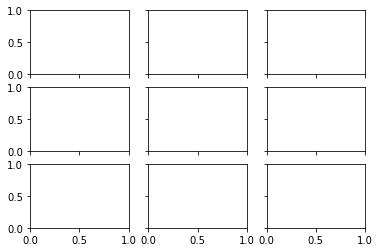

In [1]:
from matplotlib.pylab import subplots,cm

fig,axs=subplots(3,3,sharex=True,sharey=True)
for ax in axs.flatten():
    y=gen_rand_slash(direction="forward")
    ax.imshow(y,cmap=cm.gray_r)

In [33]:
import os

def split_by_n(fname,n=3):
    """This function divides the file into equal-sized n chunks
    such that no lines are truncated. 

    Args:
        fname (str): filepath for source txt file
        n (int, optional): Number of splits to be created. Defaults to 3.
    """

    assert isinstance(fname,str), "Checks whether the file path is string or not."
    assert os.path.exists(fname), "File not found in the given path"
    assert isinstance(n, int), "Chunk size must be integer"
    assert n>0, "Chunks can't be less than or equal to 0"

    chunkSize = os.path.getsize(fname)/n
    currChunkSize = 0
    newFileFlag = 1
    c=0

    with open(fname,"r") as f:    
        while c<n:
            l = f.readline()
            if len(l)==0:
                break

            if currChunkSize+len(l)>chunkSize and c!=n-1:
                c+=1
                newFileFlag=1
                currChunkSize=0

            if newFileFlag:
                targetFile = open(fname+f"_{c:03d}.txt","a")

            currChunkSize+=len(l)
            targetFile.write(l)
        


In [35]:
split_n("pg5200.txt")

In [2]:
import re,string

def encrypt_message(message, fname):
    """Given `message`, which is a lowercase string without any punctuation, and `fname` which is the
    name of a text file source for the codebook, generate a sequence of 2-tuples that
    represents the `(line number, word number)` of each word in the message. The output is a list
    of 2-tuples for the entire message. Repeated words in the message should not have the same 2-tuple. 

    Args:
        message ([str]): [given message to be encrypted]
        fname ([str]): [given filename for codebook]
    
    Returns:
        [list]: [encrypted message 2-tuple list]
    """

    assert isinstance(message,str), "Check whether message is string or not."
    assert isinstance(fname,str), "Checks whether the file path is string or not."
    assert os.path.exists(fname), "File not found in the given path."

    with open(fname,"r") as f:
        mapi={}
        cnt=1
        p = re.compile("[%s]"% re.escape(string.punctuation))
        
        while True:
            line = f.readline()
            if line=="":
                break
            line=p.sub('',line).lower()
            for i,w in enumerate(line.split(" ")):
                mapi[w]=(cnt,i+1)
            
            cnt+=1
    encrypted = []
    for w in message.split(" "):
        assert w in mapi.keys(), "word in message is not in file.txt"
        encrypted.append(mapi[w])
    return encrypted

def decrypt_message(inlist,fname):
    """Given `inlist`, which is a list of 2-tuples`fname` which is the
    name of a text file source for the codebook, return the encrypted message.

    Args:
        inlist ([list]): [list of words to be decrypted]
        fname ([str]): [given filename for codebook]

    Returns:
        [str]: [decrypted message]
    """
    mapi={}
    with open(fname,"r") as f:
        mapi={}
        cnt=1
        p = re.compile("[%s]"% re.escape(string.punctuation))
        p = re.compile(f"[{re.escape(string.punctuation)}]")
        while True:
            line = f.readline()
            if line=="":
                break
            line=p.sub('',line).lower()            
            mapi[cnt]=line.split(" ")
            cnt+=1
    
    decrypted=[]
    for line,wcount in inlist:
        assert line in mapi.keys(), "check whether valid line number is provided or not"
        assert wcount-1 <len(mapi[line]), "check whether valid word number is provided or not"
        decrypted.append(mapi[line][wcount-1])
    return " ".join(decrypted)




            

In [3]:
l=encrypt_message("let us not say we met late at the night about the secret","pg5200.txt")
decrypt_message(l,"pg5200.txt")

'let us not say we met late at the night about the secret'

In [26]:
import random
from collections import Counter,defaultdict

def multinomial_sample(n,p,k=1):
    """Return samples from a multinomial distribution.

    Args:
        n (int): number of trials.
        p (list): list of probabilities.
        k (int, optional): number of desired samples. Defaults to 1.

    Returns:
        list: Returns list of sample counts from the multinomial distribution.
    """

    assert isinstance(n,int), "check whehter n is not integer"
    assert isinstance(p,list), "check whether probability is not a list"
    assert isinstance(k,int), "check whether k is integer or not"
    assert sum(p)==1, "check whether sum of probability is 1.0 or not"
    assert k>0, "check that number of samples requested are >1"
    
    samples=[]
    for _ in range(k):
        sample = random.choices(range(len(p)),p,k=n)        
        sampleCount = [0]*len(p)

        for key,value in Counter(sample).items():
            sampleCount[key]=value

        samples.append(sampleCount)
        
    return samples

In [27]:
# multinomial_sample(10,[1/3,1/3,1/3],k=10)
multinomial_sample(2,[0.5,0,0.5,0],k=3)

[[0, 0, 2, 0], [0, 0, 2, 0], [2, 0, 0, 0]]

In [7]:

# x=x['Is there anything in particular you want to use Python for?']

In [ ]:
print(num_pairs([3,5,1,7,8,10,62,13]))

5


In [5]:
import pandas as pd
import numpy as np


def split_count(x):
    """Ths function splits the DataSeries column with multiple comma-separated values into dataframe with count of individual unique values. 

    Args:
        x (Pandas Series): Series column with multiple comma-separated values

    Returns:
        Pandas Dataframe: Dataframe with count for each value repeated in column
    """

    assert isinstance(x, pd.core.series.Series)

    t = x.str.split(",")
    def randooo(x):
        return "aditya"
    df = pd.DataFrame({"survey_data": t, "count": t.apply(randooo)})

    exploded_df = df.explode("survey_data")
    exploded_df.survey_data = exploded_df.survey_data.str.strip()
    grp_df = (
        exploded_df.groupby(["survey_data"])["count"].count().sort_values().to_frame()
    )
    grp_df.index.name = None

    return grp_df


In [6]:
df=pd.read_csv("survey_data.csv")
df.columns

split_count(df['Is there anything in particular you want to use Python for?'])

,count
All of the above,1
As a general skill,1
Computer Vision,1
Computer vision,1
Computer vision/image processing,1
EDA tools,1
Image Processing,1
not sure,1
scripting seems desirable for many jobs,1
Web development,104


In [50]:
import pandas as pd


def add_month_yr(x):
    """This function takes survey data frame and creates a dataframe with time stamp as re-formatted to month-year format with ID as index.

    Args:
        x (pd.DataFrame): survey data dataframe

    Returns:
        pd.DataFrame: Time dataframe with reformatted column
    """

    assert (
        "Timestamp" in x.columns
    ), "Checks whether Timestamp column is present or not."
    assert (
        x.Timestamp.isnull().sum() == 0
    ), "Check whether Timestamp column is null or not."

    x.Timestamp = pd.to_datetime(x.Timestamp, infer_datetime_format=True)
    x["month-yr"] = x.Timestamp.dt.strftime("%b-%Y")
    time_df = x[["month-yr", "ID"]]
    time_df = time_df.set_index("ID")

    return time_df


In [45]:
import pandas as pd

def count_month_yr(x):
    """This function counts the months-year from previous datframe obtained.

    Args:
        x (pd.DataFrame): survey-data dataframe

    Returns:
        pd.DataFrame: Dataframe with month-yr count
    """

    assert isinstance(x,pd.DataFrame)  

    month_df = x
    if "month-yr" not in x.columns:
        month_df = add_month_yr(x)
    month_df["Timestamp"] = pd.to_datetime(month_df["month-yr"])
    

    return month_df.to_frame()


In [132]:
df=pd.read_csv("survey_data.csv")
month_df=add_month_yr(df)

month_df["Timestamp"] = pd.to_datetime(month_df["month-yr"])
# month_df['Timestamp']=month_df['Timestamp'].astype("category")
sorted_months_yrs = list(pd.to_datetime(month_df["Timestamp"].unique()).strftime("%b-%Y"))

df["month-yr"] = pd.Categorical(df["month-yr"],categories=sorted_months_yrs,ordered=True)


In [8]:
import pandas as pd


def add_month_yr(x):
    """This function takes survey data frame and creates a dataframe with time stamp as re-formatted to month-year format with ID as index.

    Args:
        x (pd.DataFrame): survey data dataframe

    Returns:
        pd.DataFrame: Time dataframe with reformatted column
    """

    assert (
        "Timestamp" in x.columns
    ), "Checks whether Timestamp column is present or not."
    assert (
        x.Timestamp.isnull().sum() == 0
    ), "Check whether Timestamp column is null or not."

    x.Timestamp = pd.to_datetime(x.Timestamp, infer_datetime_format=True)
    x["month-yr"] = x.Timestamp.dt.strftime("%b-%Y")
    time_df = x[["month-yr", "ID"]]
    time_df = time_df.set_index("ID")

    return time_df


def fix_categorical(x):
    """ This function takes the month-yr dataframe column and then return the same dataframe with an updated column of CategoricalDtype that does the sorting based on month-yr index.

    Args:
        x (pd.DataFrame): survey-data dataframe

    Returns:
        pd.DataFrame: Dataframe with fixed updated column
    """

    assert isinstance(x, pd.DataFrame), "Check whether x is dataframe or not"

    month_df = x
    if "month-yr" not in x.columns:
        month_df = add_month_yr(x)
    month_df["Timestamp"] = pd.to_datetime(month_df["month-yr"])
    sorted_months_yrs = list(
        pd.to_datetime(month_df["Timestamp"].unique()).strftime("%b-%Y")
    )
    x["month-yr"] = pd.Categorical(
        x["month-yr"], categories=sorted_months_yrs, ordered=True
    )

    return x


In [11]:
df=pd.read_csv("survey_data.csv")
df=fix_categorical(add_month_yr(df))
# df.dtypes
df.groupby('month-yr')['Timestamp'].count().to_frame().sort_index() 
# df.head()

,Timestamp
month-yr,
Sep-2017,74
Jan-2018,148
Feb-2018,2
Mar-2018,41
Apr-2018,28
Sep-2018,130
Oct-2018,6
Jan-2019,57


In [1]:
class Rational:
    """ Class implements rational numbers (ratio of integers)."""

    def __init__(self, num, dnm):
        """Intializes Rational number object; assigning numerator and denominator in appropriate fields.

        Args:
            num (int): Numerator of Rational Number
            dnm (int): Denominator of Rational Number
        """

        assert isinstance(num, int), "Check whether numerator is integer or not" 
        assert isinstance(dnm, int), "Check whether denominator is integer or not" 
        
        self.num = num
        self.dnm = dnm

    def __repr__(self):
        if self.dnm != 1:
            return f"{self.num}/{self.dnm}"
        else:
            return f"{self.num}"

    def compute_hcf(self,x, y):
        while y:
            x, y = y, x % y
        return x

    def simplest_form(self, rat):

        assert isinstance(rat, Rational), " Check whether the class of rat is Rational"
        
        hcf = self.compute_hcf(min(rat.num, rat.dnm), max(rat.num, rat.dnm))
        rat.num //= hcf
        rat.dnm //= hcf

        return rat

    def __float__(self):
        return self.num / self.dnm

    def __int__(self):
        return self.num // self.dnm

    def __neg__(self):
        self.num = -1 * self.num
        return self

    def __mul__(self, other):

        if isinstance(other, Rational):
            return Rational(self.num * other.num, self.dnm * other.dnm)
        else:
            assert isinstance(other, int), " Check whether the other is int or not."
            return self.simplest_form(Rational(self.num * other, self.dnm))
    
    def __rmul__(self, other):
    
        if isinstance(other, Rational):
            return Rational(self.num * other.num, self.dnm * other.dnm)
        else:
            assert isinstance(other, int), " Check whether the other is int or not."
            return self.simplest_form(Rational(self.num * other, self.dnm))

    def __truediv__(self, other):
        if isinstance(other, Rational):
            return self.simplest_form(
                Rational(self.num * other.dnm, self.dnm * other.num)
            )
        else:
            assert isinstance(other, int), " Check whether the other is int or not."
            assert other!=0, "Division by zero not allowed."
            return self.simplest_form(Rational(self.num, other * self.dnm))

    def __rtruediv__(self, other):
        assert isinstance(other, int), " Check whether the 2nd operand is int or not."
        return Rational(other * self.dnm, self.num)

    def __add__(self, other):
        if isinstance(other,Rational):
            num_new = (self.num * other.dnm) + (other.num * self.dnm)
            dnm_new = self.dnm * other.dnm            
        else:
            assert isinstance(other, int), " Check whether the 2nd operand is int or not."
            return self.__add__(Rational(other,1))
            

        return self.simplest_form(Rational(num_new, dnm_new))

    def __sub__(self, other):
        if isinstance(other,Rational):
            num_new = (self.num * other.dnm) - (other.num * self.dnm)
            dnm_new = self.dnm * other.dnm
        else:
            assert isinstance(other, int), " Check whether the 2nd operand is int or not."
            return self.__sub__(Rational(other,1))

        return self.simplest_form(Rational(num_new, dnm_new))

    def __lt__(self, other):
        return (self.num * other.dnm) < (other.num * self.dnm)

    def __le__(self, other):
        return (self.num * other.dnm) <= (other.num * self.dnm)

    def __gt__(self, other):
        return (self.num * other.dnm) > (other.num * self.dnm)

    def __ge__(self, other):
        return (self.num * other.dnm) >= (other.num * self.dnm)    

    def __eq__(self, other):
        
        assert isinstance(other,Rational), "Check whether the 2nd operand is Rtional or not."
        assert isinstance(self,Rational), "Check whether the 1st operand is Rtional or not."

        s1 = self.simplest_form(self)
        s2 = self.simplest_form(other)

        return s1.num == s2.num and s1.dnm == s2.dnm
    def __abs__(self):
        if self.num<0:
            return -1*self
        return self


In [5]:
abs(Rational(-3,4))

3/4

In [41]:
r = Rational(3,4)
-1/(Rational(10,3))

-3/10

In [42]:
float(-1/r)

-1.3333333333333333

In [43]:
int(Rational(10,3))

3

In [44]:
Rational(10,3) * Rational(101,8) - Rational(11,8)

977/24

In [45]:
sorted([Rational(10,3),Rational(9,8), Rational(10,1), Rational(1,100)])

[1/100, 9/8, 10/3, 10]

In [46]:
Rational(12345,128191) + Rational(101,103) * 30/ 44

222183135/290480806

In [3]:
class Rational:
    """ Class implements rational numbers (ratio of integers)."""

    def __init__(self, num, dnm):
        """Intializes Rational number object; assigning numerator and denominator in appropriate fields.

        Args:
            num (int): Numerator of Rational Number
            dnm (int): Denominator of Rational Number
        """

        assert isinstance(num, int), "Check whether numerator is integer or not"
        assert isinstance(dnm, int), "Check whether denominator is integer or not"

        self.num = num
        self.dnm = dnm

    def __repr__(self):
        if self.dnm != 1:
            return f"{self.num}/{self.dnm}"
        else:
            return f"{self.num}"

    def compute_hcf(self, x, y):
        while y:
            x, y = y, x % y
        return x

    def simplest_form(self, rat):

        assert isinstance(rat, Rational), " Check whether the class of rat is Rational"

        hcf = self.compute_hcf(min(rat.num, rat.dnm), max(rat.num, rat.dnm))
        rat.num //= hcf
        rat.dnm //= hcf

        return rat

    def __float__(self):
        return self.num / self.dnm

    def __int__(self):
        return self.num // self.dnm

    def __neg__(self):
        self.num = -1 * self.num
        return self

    def __mul__(self, other):

        if isinstance(other, Rational):
            return Rational(self.num * other.num, self.dnm * other.dnm)
        else:
            assert isinstance(other, int), " Check whether the other is int or not."
            return self.simplest_form(Rational(self.num * other, self.dnm))

    def __rmul__(self, other):

        if isinstance(other, Rational):
            return Rational(self.num * other.num, self.dnm * other.dnm)
        else:
            assert isinstance(other, int), " Check whether the other is int or not."
            return self.simplest_form(Rational(self.num * other, self.dnm))

    def __truediv__(self, other):
        if isinstance(other, Rational):
            return self.simplest_form(
                Rational(self.num * other.dnm, self.dnm * other.num)
            )
        else:
            assert isinstance(other, int), " Check whether the other is int or not."
            assert other != 0, "Division by zero not allowed."
            return self.simplest_form(Rational(self.num, other * self.dnm))

    def __rtruediv__(self, other):
        assert isinstance(other, int), " Check whether the 2nd operand is int or not."
        return Rational(other * self.dnm, self.num)

    def __add__(self, other):
        if isinstance(other, Rational):
            num_new = (self.num * other.dnm) + (other.num * self.dnm)
            dnm_new = self.dnm * other.dnm
        else:
            assert isinstance(
                other, int
            ), " Check whether the 2nd operand is int or not."
            return self.__add__(Rational(other, 1))

        return self.simplest_form(Rational(num_new, dnm_new))

    def __sub__(self, other):
        if isinstance(other, Rational):
            num_new = (self.num * other.dnm) - (other.num * self.dnm)
            dnm_new = self.dnm * other.dnm
        else:
            assert isinstance(
                other, int
            ), " Check whether the 2nd operand is int or not."
            return self.__sub__(Rational(other, 1))

        return self.simplest_form(Rational(num_new, dnm_new))

    def __lt__(self, other):
        return (self.num * other.dnm) < (other.num * self.dnm)

    def __le__(self, other):
        return (self.num * other.dnm) <= (other.num * self.dnm)

    def __gt__(self, other):
        return (self.num * other.dnm) > (other.num * self.dnm)

    def __ge__(self, other):
        return (self.num * other.dnm) >= (other.num * self.dnm)

    def __eq__(self, other):

        assert isinstance(
            other, Rational
        ), "Check whether the 2nd operand is Rational or not."
        assert isinstance(
            self, Rational
        ), "Check whether the 1st operand is Rational or not."

        s1 = self.simplest_form(self)
        s2 = self.simplest_form(other)

        return s1.num == s2.num and s1.dnm == s2.dnm

    def __abs__(self):
        assert isinstance(self, Rational), "Check whether the x is Rational or not."

        if self.num < 0:
            return -1 * self
        return self


def square_root_rational(x, abs_tol=Rational(1, 1000)):
    """This function takes an input rational number x and returns the square root of x to absolute precision abs_tol.

    Args:
        x (Rational): Rational number whose sqrt is required.
        abs_tol (Rational, optional): Error tolerance of sqrt estimate. Defaults to Rational(1,1000).

    Returns:
        [Rational]: Square root estimate of x.
    """
    assert isinstance(x, Rational), "Check whether Rational input is provided."
    assert isinstance(
        abs_tol, Rational
    ), "Check whether Rational tolerance is provided."
    assert x > Rational(0,1), "Check whether x is positive or not."

    low = Rational(0, 1)
    high = x + 1
    estimate = (low + high) / 2
    while abs((estimate * estimate) - x) >= abs_tol:
        if ((low * low) - x) * ((estimate * estimate) - x) < Rational(0, 1):
            high = estimate
        else:
            low = estimate
        estimate = (high + low) / 2
    return estimate



In [6]:
square_root_rational(Rational(1112,3),abs_tol=Rational(1,10000))

1938040595/100663296

In [7]:
1938040595/100663296

19.252703537543614

In [1]:
import math
math.sqrt(1112/3)

19.252705437591537

In [3]:
import numpy as np
from numpy import arange

In [4]:
x = np.arange(3)
y=np.arange(5)
x=np.array(x).reshape(len(x),-1)
x

array([[0],
       [1],
       [2]])

In [5]:
y

array([0, 1, 2, 3, 4])

In [6]:
x[:,None]*y

array([[[0, 0, 0, 0, 0]],

       [[0, 1, 2, 3, 4]],

       [[0, 2, 4, 6, 8]]])

In [17]:
import numpy as np
from numpy import arange

def solvefrob(coefs,b):
    """This function solved Forbenius equation of format:
    a_1*x_1 + ....a_n*x_n = b.

    Args:
        coefs (list): List of a_i coefficients 
        b (int): Value of RHS in Forbenius equation

    Returns:
        list(tuple): All possible solution tuples for the equation.
    """
    
    assert isinstance(coefs,list), "Check whether the coefficients list is there or not."
    assert isinstance(b,int), "Check whether the RHS is integer or not."
    assert all(co>0 for co in coefs), "Check all coeffcients are greater than zero or not."
    assert b>0, "Check all coeffcients are greater than zero or not."

    limits=[] # Max feasable value acceptable for each coefficient.

    for c in coefs:
        assert isinstance(c,int), "Check all coefficients are integers or not."
        limits.append(b//c)
        
    for i,c in enumerate(coefs):
        temp=np.arange(limits[i]+1)
        for j in range(i):
            temp=temp[:,np.newaxis]
        limits[i]=c*temp
        
    eq_sum=(sum(limits)==b)
    np_tuples=np.flip(np.transpose(np.nonzero(eq_sum)))
    answer=[]
    for i in range(len(np_tuples)):
        answer.append(tuple(np_tuples[i]))
    
    return answer


In [18]:
b=10
coefs=[1,2,3,5]

solvefrob(coefs,b)

[(0, 0, 0, 2),
 (0, 1, 1, 1),
 (2, 0, 1, 1),
 (1, 2, 0, 1),
 (3, 1, 0, 1),
 (5, 0, 0, 1),
 (1, 0, 3, 0),
 (0, 2, 2, 0),
 (2, 1, 2, 0),
 (4, 0, 2, 0),
 (1, 3, 1, 0),
 (3, 2, 1, 0),
 (5, 1, 1, 0),
 (7, 0, 1, 0),
 (0, 5, 0, 0),
 (2, 4, 0, 0),
 (4, 3, 0, 0),
 (6, 2, 0, 0),
 (8, 1, 0, 0),
 (10, 0, 0, 0)]

In [46]:
a3[:,None,None].shape
(a1+2*a2[:,None]).shape

(5, 10)

In [36]:
a1=np.arange(10)
a2=np.arange(5)
a3=np.arange(3)

a1+2*a2[:,None]+3*a3[:,None,None]

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
        [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
        [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17]],

       [[ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
        [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],

       [[ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
        [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]])

In [18]:
x=np.arange(2)
y=x[:,np.newaxis]
z=x[:,np.newaxis,np.newaxis]
z


array([[[0]],

       [[1]]])

In [37]:
from collections import defaultdict

def count_paths(m,n,blocks):
    """Starting at the upper left and only moving downwards and rightwards, this function finds the number of connected paths between the top-left square and the bottom right square by traversing non-blocked places.

    Args:
        m (int): number of horizontal rows.
        n (int): number of vertical columns.
        blocks (list):  list of tuples indicating the blocked entries in the grid.

    Returns:
        int: Number of possible unblocked paths from top-left ot bottom-right.
    """

    assert isinstance(m,int), "Check whether M is integer or not."
    assert m>0, "Check whether m>0 or not."
    assert isinstance(n,int), "Check whether N is integer or not."
    assert n>0, "Check whether n>0 or not."

        
    assert isinstance(blocks,list), "Check whether Blocks is list or not."

    grid = [[0 for _ in range(n)] for _ in range(m)]
    for b in blocks:
        assert all(x>=0 for x in b), "Check all blocks coordinates are legit or not."

        if b[0]==0 and b[1]==0: # Check if the starting point is blocked itself.
            return 0

        grid[b[0]][b[1]]=1
        
    visited=defaultdict(int)

    def crawl(i,j,visited):
        """This function crawls through the grid in DFS fashion avoiding the blocks to check whether bottom-rightmost end can be reached or not. 

        Args:
            i (int): x-coordinate
            j (int): y-coordinate
            visited (dict): dictionary of visited coordinates.

        Returns:
            int: 1 if end can be reached otheewise 0.
        """
        
        if i>=m or j>=n:
            return 0
        if i==m-1 and j==n-1:
            return 1

        path_sum=0
        if i+1<m and visited[(i+1,j)]==0 and grid[i+1][j]!=1:
            visited[(i+1,j)]=1
            path_sum+= crawl(i+1,j,visited)
            visited[(i+1,j)]=0
        
        if j+1<n and visited[(i,j+1)]==0 and grid[i][j+1]!=1:
            visited[(i,j+1)]=1
            path_sum+= crawl(i,j+1,visited)
            visited[(i,j+1)]=0
        return path_sum

    return crawl(0,0,visited)



In [40]:
count_paths(3,4,[(0,3),(1,1)])

3

In [48]:
def get_trapped_water(seq):
    """Computes how many units of water remain trapped between the walls in the map.

    Args:
        seq (list): input list of elevations. 

    Returns:
        int: volume of water trapped.
    """
    assert isinstance(seq,list), "Check whether wall map is list or not."
    
    n=len(seq)
    rmax = [0]
    curr_max = seq[n-1]

    for i in range(n-2,-1,-1):
        assert isinstance(seq[i],int), "Check whether all wall elevations are int or not."
        curr_max =max(curr_max,seq[i+1])
        rmax.append(curr_max)
    
    rmax.reverse()

    lmax = seq[0]
    vol_water=0
    for i in range(1,n):
        if lmax>seq[i] and rmax[i]>seq[i]:
            vol_water+=(min(lmax,rmax[i])-seq[i])
        lmax=max(lmax,seq[i])
    return vol_water






In [50]:
get_trapped_water([3,3, 0, 1, 3, 0, 5] )

8

In [64]:


def next_permutation(t):
    """Given a permutation of any length, generate the next permutation in lexicographic order.

    Args:
        t (tuple): input tuple

    Returns:
        tuple: next permutation 
    """
    assert isinstance(t,tuple), "Check whether the input is tuple or not."
    assert all(isinstance(x,int) for x in t) or all(isinstance(x,str) for x in t), "Check all the inputs are of same type"

    assert len(t)==len(set(t)), "all unique elements or not"

    t=list(t)
    n=len(t)
    pos = n-1

    # find position for next character till which tuples are in descending order
    while pos>0 and t[pos-1]>t[pos]:
        pos-=1

    t[pos:]=reversed(t[pos:])

    # find the lead next position for generating lowest lexigraphic order.
    if pos>0:
        next_pos =pos
        while t[pos-1]>t[next_pos]:
            next_pos+=1

        t[pos-1],t[next_pos]=t[next_pos],t[pos-1]

    return tuple(t)
    

In [66]:
next_permutation((1,2))

(2, 1)

In [116]:
next_permutation((0, 5, 2, 1, 4, 7, 3, 6))

(0, 5, 2, 1, 4, 7, 6, 3)

In [117]:
next_permutation((3,2,1))

(1, 2, 3)

In [120]:
next_permutation((1,"b","a"))

AssertionError: Check all the inputs are of same type

In [54]:
from collections import defaultdict

class Polynomial():
    """Class that can implement a univariate polynomial (Polynomial) over the field of integers.
    """

    def __init__(self,polyDict):
        """Intializes Polynomial object; assigning the dictionary with coefficients and powers.

        Args:
            polyDict (dict): keys are powers, values are coefficients
        """
        assert all(isinstance(k, int) and isinstance(v, int) for k,v in polyDict.items()), "Check all the powers and coeffs are integer or not."
        
        self.polyDict = dict(sorted(polyDict.items(), key=lambda x:x[0]))
    
    def __repr__(self):
        out=[]
        self.polyDict ={k:v for k,v in self.polyDict.items() if v!=0}

        for k,v in self.polyDict.items():
            if v<0:
                out.append("-")
            if v>0 and len(out)!=0:
                out.append("+")

            if k==0:
                out.append(str(abs(v)))
            elif k==1:
                if abs(v)==1:
                    out.append(f"x")
                else:
                    out.append(f"{abs(v)} x")                    
            else:
                if abs(v)==1:
                    out.append(f"x^({k})")
                else:
                    out.append(f"{abs(v)} x^({k})")
        return " ".join(out)

    def __mul__(self,other):
        assert isinstance(other, Polynomial) or isinstance(other, int), "Only integer or polynomial class operations are allowed."
        
        if isinstance(other,int):
            return Polynomial({k:v*other for k,v, in self.polyDict.items()})
        elif isinstance(other,Polynomial):
            mul_dict=defaultdict(int)
            for k1,v1 in self.polyDict.items():
                for k2,v2 in other.polyDict.items():
                    mul_dict[k1+k2]+=v1*v2
            mul_dict={k:v for k,v in mul_dict.items() if v!=0}
            mul_dict=dict(sorted(mul_dict.items(), key=lambda x:x[0]))

            if mul_dict=={}:
                return Polynomial({0:0}) 
                    
            return Polynomial(mul_dict)

    
    def __rmul__(self,other):
        return self.__mul__(other)

    
    def __add__(self,other):
        assert isinstance(other, Polynomial) or isinstance(other, int), "Only integer or polynomial class operations are allowed."

        if isinstance(other,Polynomial):
            comb_k = {**self.polyDict,**other.polyDict}.keys()
            add_dict=defaultdict(int)
            for k in comb_k:
                if k in self.polyDict:
                    add_dict[k]+=self.polyDict[k]
                
                if k in other.polyDict:
                    add_dict[k]+=other.polyDict[k]
            add_dict={k:v for k,v in add_dict.items() if v!=0}
            add_dict=dict(sorted(add_dict.items(), key=lambda x:x[0]))

            if add_dict=={}:
                return Polynomial({0:0}) 
                    
            return Polynomial(add_dict)
        elif isinstance(other,int):
            if 0 not in self.polyDict:
                self.polyDict[0]=0
            self.polyDict[0]+=other

            return self

    def __radd__(self, other):
        return self.__add__(other)
            
    def __sub__(self,other):
        assert isinstance(other, Polynomial) or isinstance(other, int), "Only integer or polynomial class operations are allowed."

        return self+(-1*other)
    
    def __rsub__(self, other):
        return self - self.__mul__(2) + other
    
    def subs(self,x):
        """Function susbtitutes value x into polynomial to find f(x)

        Args:
            x (int): input value

        Returns:
            int : value of f(x)
        """
        assert isinstance(x,int), "check that input is integer or not."

        value = 0
        for k,v in self.polyDict.items():
            value+=v*(x**k)
        return value

    def __eq__(self,other):
        assert isinstance(other, Polynomial) or isinstance(other, int), "Only integer or polynomial class operations are allowed."

        if isinstance(other,int):
            return self.__eq__(Polynomial({0:other}))
        elif isinstance(other,Polynomial):
            if len(self.polyDict.items()) != len(other.polyDict.items()): return False
            return self.polyDict==other.polyDict      

    def degree(self):
        return list(self.polyDict.keys())[-1]      


    def __truediv__(self,other):
        assert isinstance(other, Polynomial) or isinstance(other, int), "Only integer or polynomial class operations are allowed."

        assert other!=0,"Division by zero not allowed."

        if isinstance(other,Polynomial):
            q=Polynomial({0:0})        
            while self.degree()>=other.degree():
                diff = self.degree()-other.degree()
                
                if self.polyDict[self.degree()]%other.polyDict[other.degree()]:
                    raise NotImplementedError("Not a valid division")
                q_val = self.polyDict[self.degree()]//other.polyDict[other.degree()]

                if q_val==0:
                    break
                q+=Polynomial({diff:q_val})
                self=self-(Polynomial({diff:q_val})*other)
            rem = self
            if rem==0:
                return q
            raise NotImplementedError("Not a valid division")
        elif isinstance(other,int):            
            return self.__truediv__(Polynomial({0:other}))
        


            

    


In [59]:
p==0

False

In [56]:
p=Polynomial({0:8,1:0,3:4}) 
p==p

True

In [12]:
p=Polynomial({0:8,1:0,3:4}) 
repr(p)

'8 + 4 x^(3)'

In [16]:
p+q

- 2 + x + x^(2)

In [17]:
p = Polynomial({2:1,0:-1})
q = Polynomial({1:1,0:-1})
print(p/q)


1 + x


In [19]:
p=Polynomial({0:8,1:2,3:4})
q=Polynomial({0:8,1:2,2:8,4:4})
repr(p)

'8 + 2 x + 4 x^(3)'

In [21]:
p+q

16 + 4 x + 8 x^(2) + 4 x^(3) + 4 x^(4)

In [22]:
(p*4 + 5 - 3*p) -1

12 + 2 x + 4 x^(3)

In [24]:
type(p-p)

__main__.Polynomial

In [29]:
p==q

False

In [30]:
p-p==0

True

In [8]:
import numpy as np
from collections import defaultdict


def find_convex_cover(pvertices, clist):
    """ For convex olygon with vertices as "pvertices" and circles inside it with cetners as "clist", this function calculates the radius such that sum of aras of circles is minimized and that vertex is contained in atleast one of the circles.

    Args:
        pvertices (np.array): List of vertex co-ordinates of polygon.
        clist (np.array): Co-ordinates of circle centers.

    Returns:
        list: List of radii for each circle center.
    """

    # Vertices Corrdinates 
    x_v = pvertices[:, 0]
    y_v = pvertices[:, 1]

    # Center Corrdinates 
    clist = np.array(clist)
    x_c = clist[:, 0]
    y_c = clist[:, 1]

    # Calculate distance of each circle center from every vertex. 
    dist = np.sqrt(
        abs(x_v.reshape(-1, 1)[:, None] - x_c.reshape(-1, 1)) ** 2
        + abs(y_v.reshape(-1, 1)[:, None] - y_c.reshape(-1, 1)) ** 2
    )

    # Extract circle centers with distance which are closest to each vertex
    min_v = [
        (x, y)
        for x, y in zip(
            np.sort(dist, axis=1)[:, 0][:, 0], np.argsort(dist, axis=1)[:, 0][:, 0]
        )
    ]

    # For common closest centers, select the radius among all common radius which has max distance.
    mapi = defaultdict(int)
    for d, v in min_v:
        mapi[v] = max(mapi[v], d)

    # Final list with radius for each center
    ans = [mapi[i] for i in range(len(clist))]

    return ans



In [15]:
find_convex_cover(pvertices,clist)

[0, 0, 0.10308867698080958, 0, 0.06328931721583797, 0.04821785454510229, 0]

In [13]:

 
pvertices = np.array([[ 0.573,  0.797],           
                    [ 0.688,  0.402],                                                              
                                                                   
                    [ 0.757,  0.796],                                                              
                    [ 0.589,  0.811]]) 

In [14]:
clist = [(0.7490863467660889, 0.4917635308023209),                                       
              (0.6814339441396109, 0.6199470305156477),                                                
              (0.7241617773773865, 0.6982813914515696),                                                
              (0.6600700275207232, 0.7516911829987891),                                                
              (0.6315848053622062, 0.7730550996176769),                                                
              (0.7348437356868305, 0.41342916986639894),                                               
              (0.7597683050755328, 0.31729154508140384)]  

In [6]:
x_v = pvertices[:,0]
y_v = pvertices[:,1]

clist= np.array(clist)
x_c = clist[:,0]
y_c = clist[:,1]

type(pvertices)


numpy.ndarray

In [11]:
dist = np.sqrt(abs(x_v.reshape(6,1)[:,None]-x_c.reshape(-1,1))**2 + abs(y_v.reshape(6,1)[:,None]-y_c.reshape(-1,1))**2)
np.argsort(dist,axis=1)[:,0][:,0]
# np.sort(dist,axis=1)[:,:2][:,:2]
# np.sort(dist,axis=1)[:,0][:,0]


array([4, 5, 6, 5, 2, 4], dtype=int64)

In [108]:
min_v=[(x,y) for x,y in zip(np.sort(dist,axis=1)[:,0][:,0],np.argsort(dist,axis=1)[:,0][:,0])]
mapi=defaultdict(int)
for d,v in min_v:
    mapi[v] = max(mapi[v],d)

ans = [mapi[i] for i in range(len(clist))]
ans

[0,
 0,
 0.10308867698080958,
 0,
 0.06328931721583797,
 0.06832268735016316,
 0.0803130047744335]

In [105]:
min_v=[]
for v,(x_v,y_v) in enumerate(pvertices):
    mini= float('inf')
    mini_c = -1
    for c,(x_c,y_c) in enumerate(clist):    
        d = math.sqrt((x_c-x_v)**2  + (y_c-y_v)**2)
        if d<=mini:
            mini = d
            mini_c=c
    min_v.append((mini,mini_c))
min_v



[(0.06328931721583797, 4),
 (0.04821785454510229, 5),
 (0.0803130047744335, 6),
 (0.06832268735016316, 5),
 (0.10308867698080958, 2),
 (0.057037541258029456, 4)]

In [66]:
from collections import defaultdict
mapi=defaultdict(int)
for d,v in min_v:
    mapi[v] = max(mapi[v],d)
mapi

defaultdict(int,
            {4: 0.06328931721583797,
             5: 0.06832268735016316,
             6: 0.0803130047744335,
             2: 0.10308867698080958})

In [67]:
ans=[]
for i in range(len(clist)):
    ans.append(mapi[i])
ans
    

[0,
 0,
 0.10308867698080958,
 0,
 0.06328931721583797,
 0.06832268735016316,
 0.0803130047744335]

In [77]:
x = np.array([1,2,3])
y = np.array([4,5,6])
diff=x.reshape(-1,1)[:,None]-y.reshape(-1,1)
diff


array([[[-3],
        [-4],
        [-5]],

       [[-2],
        [-3],
        [-4]],

       [[-1],
        [-2],
        [-3]]])

In [86]:
np.argsort(diff,axis=1)[:,0]



array([[2],
       [2],
       [2]], dtype=int64)

In [3]:
import math

math.e**(-4)

0.018315638888734186

In [2]:
import math
1-(math.e**(-9/10))

0.5934303402594009

In [1]:
math.sqrt(30)/10


NameError: name 'math' is not defined

In [3]:
sorted(["1","2","15","-7","300"])

['-7', '1', '15', '2', '300']

In [5]:
import time,queue,threading
q = queue.Queue()
for i in [3,2,1]:
    def f():
        time.sleep(i)
        q.put(i)
    threading.Thread(target=f).start()


In [7]:
q.get()

1

In [8]:
def func(a,b):
    a+=1
    b.append(1)
    

In [10]:
a,b = 0,[]
func(a,b)
print(a,b)

0 [1]


In [12]:
s_list=["Helo World","Hello there"]
root={}
for s in s_list:
    b=root
    for w in s.split(" "):
        if not b.get(w):
            b[w]={}
        b=b[w]
        


In [14]:
f = lambda n: 1 if n<=1 else n*f(n-1)

In [18]:
try:
    file =open(file)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_20112/3760671423.py, line 1)

In [ ]:
file